In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.special import gamma
from sympy import diff, symbols, integrate, Rational, solve, Pow, limit
from scipy.integrate import quad
from numpy.random import normal
from scipy.stats import beta, norm

In [2]:
k, p, n = 3, 1/2, 160

In [3]:
def comb(n, k):
    return math.factorial(k)/(math.factorial(k-n)*math.factorial(n))
Pk = [comb(j, k)*p**j*(1-p)**(k-j) for j in range(k+1)]
Uk = [sum(Pk[:i+1]) for i in range(len(Pk))]
print(Pk, Uk)

X = np.empty(n)
for i in range(n):
    p_val = np.random.rand()
    for j, value in enumerate(Uk):
        if p_val < value:
            X[i] = (j)
            break          
X = sorted(X)     
print(X)

[0.125, 0.375, 0.375, 0.125] [0.125, 0.5, 0.875, 1.0]
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64

In [4]:
alpha = 0.02
mex = np.mean(X)
Kx = mex * n
Beta1 = beta(a=np.sum(X), b=n*k - np.sum(X) + 1)
Beta2 = beta(a=np.sum(X)+1, b=n*k-np.sum(X))

p1 = Beta1.ppf(q=alpha/2)
p2 = Beta2.ppf(q=1-alpha/2)
print(p1, p2)

0.48338601241956 0.5909843415326962


In [5]:
NormStd = norm(0, 1)
prl = mex/k + NormStd.ppf(alpha/2)/(k*(n*k)**0.5)*(mex*(k-mex))**0.5
prr = mex/k + NormStd.ppf(1 - alpha/2)/(k*(n*k)**0.5)*(mex*(k-mex))**0.5
print(prl, prr)

0.4845581464556806 0.5904418535443193


[np.float64(0.1378791134293138), np.float64(0.5249118096326617), np.float64(0.8870510396793448), np.float64(1.0000000000000002)]
[np.float64(0.06842578739305617), np.float64(0.36502985182821407), np.float64(0.7935913361806413), np.float64(1.0)]
[np.float64(0.125), np.float64(0.4), np.float64(0.8625), np.float64(1.0)]


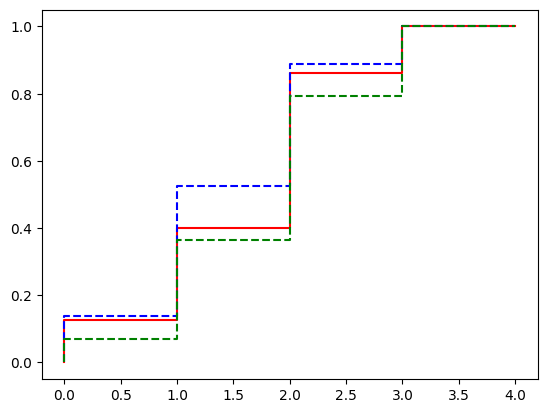

In [6]:
Pk1 = [comb(j, k)*p1**j*(1-p1)**(k-j) for j in range(k+1)]
Uk1 = [sum(Pk1[:i+1]) for i in range(len(Pk1))]
print(Uk1)

Pk2 = [comb(j, k) * p2 ** j * (1 - p2) ** (k - j) for j in range(k + 1)]
Uk2 = [sum(Pk2[:i + 1]) for i in range(len(Pk2))]
print(Uk2)

P, bars, _ = plt.hist(X, bins=k+1)
P = P/sum(P)
F = [sum(P[:i+1]) for i in range(k+1)]
print(F)
plt.close()
plt.step([i for i in range(k+2)], [0, *F], color="red")
plt.step([i for i in range(k+2)], [0, *Uk1], color="blue", linestyle="dashed")
plt.step([i for i in range(k+2)], [0, *Uk2], color="green", linestyle="dashed")